In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
train=pd.read_csv(r"D:\Project\Property_Price_Train.csv")
train

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
train.shape

(1459, 81)

# Data Cleaning

In [4]:
print("total missing values in the train dataset",sum(train.isna().sum()))     #prints number of missing values in the dataframe

total missing values in the train dataset 6960


In [5]:
train.info()                                    #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
#droping 1 column 
l_id=train["Id"]
l_id

0          1
1          2
2          3
3          4
4          5
        ... 
1454    1455
1455    1456
1456    1457
1457    1458
1458    1459
Name: Id, Length: 1459, dtype: int64

In [7]:
#id column dropped
train = train.drop(['Id'], axis=1)          
train.shape

(1459, 80)

In [8]:
#drop col
train_percentage=train.isnull().sum()/train.shape[0]
print(train_percentage[train_percentage>0.50])
train=train.drop(train_percentage[train_percentage>0.50].index,axis=1)

Lane_Type                0.937629
Pool_Quality             0.995202
Fence_Quality            0.807402
Miscellaneous_Feature    0.962988
dtype: float64


# Missing Value Treatment

In [9]:
num=train.columns[train.dtypes!='object']
cat=train.columns[train.dtypes=='object']
train[num].isnull().sum()
train[cat].isnull().sum()

Zoning_Class            0
Road_Type               0
Property_Shape          0
Land_Outline            0
Utility_Type            0
Lot_Configuration       0
Property_Slope          0
Neighborhood            0
Condition1              0
Condition2              0
House_Type              0
House_Design            0
Roof_Design             0
Roof_Quality            0
Exterior1st             0
Exterior2nd             0
Brick_Veneer_Type       8
Exterior_Material       0
Exterior_Condition      0
Foundation_Type         0
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Heating_Type            0
Heating_Quality         0
Air_Conditioning        0
Electrical_System       1
Kitchen_Quality         0
Functional_Rate         0
Fireplace_Quality     689
Garage                 81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
Pavedd_Drive            0
Sale_Type               0
Sale_Conditi

In [10]:
train.Garage_Built_Year=train.Garage_Built_Year.fillna(train.Garage_Built_Year.mean())
train.Brick_Veneer_Area=train.Brick_Veneer_Area.fillna(train.Brick_Veneer_Area.mean())
train.Lot_Extent=train.Lot_Extent.fillna(train.Lot_Extent.mean())
train.Basement_Height=train.Basement_Height.fillna("Fa")
train.Basement_Condition=train.Basement_Condition.fillna("Po")
train.Brick_Veneer_Type=train.Brick_Veneer_Type.fillna("BrkCmn")
train.BsmtFinType1=train.BsmtFinType1.fillna("LwQ")
train.BsmtFinType2=train.BsmtFinType2.fillna("GLQ")
train.Electrical_System=train.Electrical_System.fillna("Mix")
train.Fireplace_Quality=train.Fireplace_Quality.fillna("Po")
train.Garage=train.Garage.fillna("2Types")
train.Garage_Finish_Year =train.Garage_Finish_Year.fillna("Fin")
train.Garage_Quality =train.Garage_Quality.fillna("Po")
train.Garage_Condition =train.Garage_Condition.fillna("Ex")
train.Exposure_Level =train.Exposure_Level.fillna("Mn")  

In [11]:
train[num].isnull().sum()
train[cat].isnull().sum()

Zoning_Class          0
Road_Type             0
Property_Shape        0
Land_Outline          0
Utility_Type          0
Lot_Configuration     0
Property_Slope        0
Neighborhood          0
Condition1            0
Condition2            0
House_Type            0
House_Design          0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
Exterior2nd           0
Brick_Veneer_Type     0
Exterior_Material     0
Exterior_Condition    0
Foundation_Type       0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Heating_Type          0
Heating_Quality       0
Air_Conditioning      0
Electrical_System     0
Kitchen_Quality       0
Functional_Rate       0
Fireplace_Quality     0
Garage                0
Garage_Finish_Year    0
Garage_Quality        0
Garage_Condition      0
Pavedd_Drive          0
Sale_Type             0
Sale_Condition        0
dtype: int64

# dtype conversion

In [12]:
train.Road_Type.replace({"Paved":0,"Gravel":1},inplace=True)
train.Utility_Type.replace({"AllPub":0,"NoSeWa":1},inplace=True)
train.Air_Conditioning.replace({"Y":0,"N":1},inplace=True)
train.Property_Slope.replace({"GS":0,"MS":1,"SS":2},inplace=True)
train.Pavedd_Drive.replace({"Y":0,"N":1,"P":2},inplace=True)
train.Basement_Height.replace({"TA":0,"Gd":1,"Ex":2,"Fa":3},inplace=True)
train.Basement_Condition.replace({"TA":0,"Gd":1,"Fa":2,"Po":3},inplace=True)
train.Brick_Veneer_Type.replace({"None":0,"BrkFace":1,"Stone":2,"BrkCmn":3},inplace=True)
train.BsmtFinType1.replace({"Unf":0,"GLQ":1,"ALQ":2,"BLQ":3,"Rec":4,"LwQ":5},inplace=True)
train.Garage_Quality.replace({"TA":0,"Po":1,"Fa":2,"Gd":3,"Ex":4},inplace=True)
train.Garage_Condition.replace({"TA":0,"Ex":1,"Fa":2,"Gd":3,"Po":4},inplace=True)
train.Exposure_Level.replace({"No":0,"Av":1,"Mn":2,"Gd":3},inplace=True)
train.Zoning_Class.replace({"RLD":0,"RMD":1,"FVR":2,"RHD":3,"Commer":4},inplace=True)
train.Property_Shape.replace({"Reg":0,"IR1":1,"IR2":2,"IR3":3},inplace=True)
train.Heating_Type.replace({"GS":0,"MS":1,"SS":2},inplace=True)
train.Lot_Configuration.replace({"I":0,"C":1,"CulDSac":2,"FR2P":3,"FR3P":4},inplace=True)
train.Land_Outline.replace({"Lvl":0,"Bnk":1,"HLS":2,"Low":3},inplace=True)
train.Exterior2nd.replace({"VinylSd":0,"MetalSd":1,"HdBoard":2,"Wd Sdng":3,"Plywood":4,"CmentBd":5,"Wd Shng":6,"Stucco":7,"BrkFace":8,"AsbShng":9,"ImStucc":10,"Brk Cmn":11,"Stone":12,"AsphShn":13,"Other":14,"CBlock":15},inplace=True)
train.Exterior1st.replace({"VinylSd":0,"HdBoard":1,"MetalSd":2,"Wd Sdng":3,"Plywood":4,"CemntBd":5,"BrkFace":6,"WdShing":7,"Stucco":8,"AsbShng":9,"BrkComm":10,"Stone":11,"AsphShn":12,"ImStucc":13,"CBlock":14},inplace=True)
train.Neighborhood.replace({"NAmes":0,"CollgCr":1,"OldTown":2,"Edwards":3,"Somerst":4,"Gilbert":5,"NridgHt":6,"Sawyer":7,"NWAmes":8,"SawyerW":9,"BrkSide":10,"Crawfor":11,"Mitchel":12,"NoRidge":13,"Timber":14,"IDOTRR":15,"ClearCr":16,"StoneBr":17,"SWISU":18,"MeadowV":19,"Blmngtn":20,"BrDale":21,"Veenker":22,"NPkVill":23,"Blueste":24},inplace=True)
train.Condition1.replace({"Norm":0,"Feedr":1,"Artery":2,"RRNn":3,"RRAn":4,"PosN":5,"RRAe":6,"PosA":7,"RRNn":8,"RRNe":9},inplace=True)
train.Condition2.replace({"Norm":0,"Feedr":1,"Artery":2,"RRNn":3,"PosN":4,"PosA":5,"RRAn":6,"RRAe":7},inplace=True)
train.House_Type.replace({"1Fam":0,"TwnhsE":1,"Duplex":2,"Twnhs":3,"2fmCon":4},inplace=True)
train.House_Design.replace({"1Story":0,"2Story":1,"1.5Fin":2,"SLvl":3,"SFoyer":4,"1.5Unf":5,"2.5Unf":6,"2.5Fin":7},inplace=True)
train.Roof_Design.replace({"Gable":0,"Hip":1,"Flat":2,"Gambrel":3,"Mansard":4,"Shed":5},inplace=True)
train.Exterior_Material.replace({"TA":0,"Gd":1,"Ex":2,"Fa":3},inplace=True)
train.Foundation_Type.replace({"PC":0,"CB":1,"BT":2,"SL":3,"S":4,"W":5},inplace=True)
train.Exterior_Condition.replace({"TA":0,"Gd":1,"Fa":2,"Ex":3,"Po":4},inplace=True)
train.Roof_Quality.replace({"SS":0,"TG":1,"WSh":2,"WS":3,"ME":4,"M":5,"R":6,"CT":7},inplace=True)
train.Heating_Type.replace({"GasA":0,"GasW":1,"Grav":2,"Wall":3,"OthW":4,"Floor":5},inplace=True)
train.BsmtFinType2.replace({"Unf":0,"Rec":1,"GLQ":2,"LwQ":3,"BLQ":4,"ALQ":5},inplace=True)
train.Electrical_System.replace({"SBrkr":0,"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4},inplace=True)
train.Fireplace_Quality.replace({"Po":0,"Gd":1,"TA":2,"Fa":3,"Ex":4},inplace=True)
train.Garage.replace({"Attchd":0,"Detchd":1,"BuiltIn":2,"2Types":3,"Basment":4,"CarPort":5,"2TFes":6},inplace=True)
train.Fireplace_Quality.replace({"Po":0,"Gd":1,"TA":2,"Fa":3,"Ex":4},inplace=True)
train.Garage_Finish_Year.replace({"Unf":0,"Fin":1,"RFn":2},inplace=True)
train.Sale_Type.replace({"WD":0,"New":1,"COD":2,"ConLD":3,"ConLI":4,"ConLw":5,"CWD":6,"Oth":7,"Con":8},inplace=True)
train.Sale_Condition.replace({"Normal":0,"Partial":1,"Abnorml":2,"Family":3,"Alloca":4,"AdjLand":5},inplace=True)
train.Functional_Rate.replace({"TF":0,"MD2":1,"MD1":2,"MajD1":3,"MD":4,"MajD2":5,"SD":6,"MS":7},inplace=True)
train.Heating_Quality.replace({"Ex":0,"TA":1,"Gd":2,"Fa":3,"Po":4},inplace=True)
train.Kitchen_Quality.replace({"TA":0,"Gd":1,"Ex":2,"Fa":3},inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int64  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   int64  
 5   Property_Shape             1459 non-null   int64  
 6   Land_Outline               1459 non-null   int64  
 7   Utility_Type               1459 non-null   int64  
 8   Lot_Configuration          1459 non-null   int64  
 9   Property_Slope             1459 non-null   int64  
 10  Neighborhood               1459 non-null   int64  
 11  Condition1                 1459 non-null   int64  
 12  Condition2                 1459 non-null   int64  
 13  House_Type                 1459 non-null   int64

In [14]:
#Dropping duplicate values
train.drop_duplicates(inplace=True)

In [15]:
train.shape

(1459, 76)

In [16]:
# checking the corelation between the target variable and the other numerical columns
corr = train.corr().sort_values(by='Sale_Price', ascending=False)[['Sale_Price']]
corr

,Sale_Price
Sale_Price,1.000000
Overall_Material,0.790972
Grade_Living_Area,0.708584
Garage_Size,0.640383
Total_Basement_Area,0.613792
...,...
BsmtFinType1,-0.232342
Garage,-0.246884
Air_Conditioning,-0.251426
Heating_Quality,-0.369809


In [17]:
#it is used to devide train[num]
train = train.drop(['Three_Season_Lobby_Area','W_Deck_Area','Enclosed_Lobby_Area','Garage_Area','Open_Lobby_Area','Kitchen_Above_Grade','LowQualFinSF','Year_Sold'], axis=1)

In [18]:
train.tail(5)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Garage_Quality,Garage_Condition,Pavedd_Drive,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Sale_Type,Sale_Condition,Sale_Price
1454,20,2,62.0,7500,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,185000
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,0,0,2500,5,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,142125


# Exploratory Data Analysis (EDA)

In [19]:
data=train.corr()
data

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Garage_Quality,Garage_Condition,Pavedd_Drive,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Sale_Type,Sale_Condition,Sale_Price
Building_Class,1.000000,0.280131,-0.357020,-0.139852,0.024937,-0.115830,-0.025280,-2.286547e-02,-0.037909,-0.025814,...,0.047708,0.050869,0.025812,-0.026199,0.008244,-0.007738,-0.013660,0.015914,0.004546,-0.084563
Zoning_Class,0.280131,1.000000,-0.240691,-0.164122,0.115491,-0.188663,0.008481,-1.170991e-02,-0.083132,-0.019283,...,0.096578,0.093352,0.166174,-0.063862,-0.030725,-0.017773,0.030932,0.073767,0.098937,-0.183794
Lot_Extent,-0.357020,-0.240691,1.000000,0.306801,0.037333,0.197201,0.085636,2.937024e-17,0.050920,0.067637,...,-0.082049,-0.081294,-0.067835,0.037727,0.180882,0.001176,0.010178,0.009596,0.017212,0.334992
Lot_Size,-0.139852,-0.164122,0.306801,1.000000,0.197129,0.315510,0.339008,1.012216e-02,0.131091,0.436867,...,-0.041943,-0.056324,-0.002975,0.043151,0.077670,0.038064,0.001200,-0.013297,-0.016210,0.263843
Road_Type,0.024937,0.115491,0.037333,0.197129,1.000000,0.010099,0.103933,-1.682922e-03,-0.006929,0.179353,...,0.000759,0.003010,0.011236,0.033149,-0.004416,0.022729,-0.003695,0.021556,0.029713,-0.041057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miscellaneous_Value,-0.007738,-0.017773,0.001176,0.038064,0.022729,0.028600,-0.014486,-2.297261e-03,0.031745,-0.003532,...,0.001992,-0.006851,0.026391,0.031930,0.029665,1.000000,-0.006502,-0.014202,-0.031588,-0.021216
Month_Sold,-0.013660,0.030932,0.010178,0.001200,-0.003695,0.026564,0.053379,-5.155406e-02,-0.024867,0.007053,...,-0.021637,0.006895,-0.009247,0.023196,-0.033742,-0.006502,1.000000,0.042844,0.033509,0.046401
Sale_Type,0.015914,0.073767,0.009596,-0.013297,0.021556,-0.000442,-0.020414,5.827458e-02,0.011050,-0.057106,...,-0.020609,0.004003,-0.026146,-0.029723,-0.009917,-0.014202,0.042844,1.000000,0.232540,0.081037
Sale_Condition,0.004546,0.098937,0.017212,-0.016210,0.029713,-0.030480,0.027226,5.761491e-02,-0.007633,0.031110,...,0.052119,0.055776,0.000541,-0.014489,0.095814,-0.031588,0.033509,0.232540,1.000000,0.004474


In [20]:
train.shape

(1459, 68)

In [21]:
num.shape,cat.shape

((37,), (39,))

<AxesSubplot:>

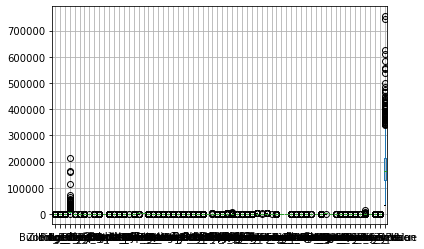

In [22]:
train.boxplot()

# Outlier Treatment

<AxesSubplot:ylabel='Building_Class'>

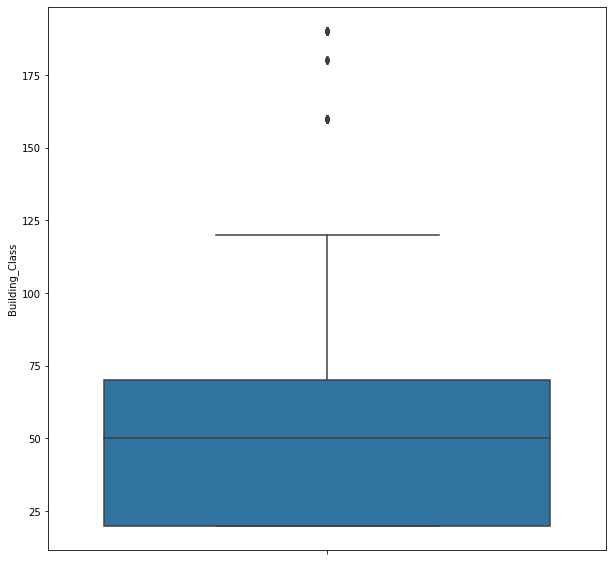

In [23]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Building_Class")

<AxesSubplot:xlabel='Building_Class', ylabel='Density'>

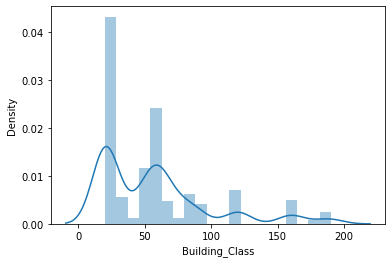

In [24]:
sns.distplot(train.Building_Class)

In [25]:
IQR=train.Building_Class.quantile(0.75)-train.Building_Class.quantile(0.25)
IQR

50.0

In [26]:
ilb1=train.Building_Class.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.Building_Class.quantile(0.75)+(IQR*3)
ilb1,iub1

(-130.0, 220.0)

In [27]:
train.loc[train["Building_Class"]>220.0,"Building_Class"]=220.0

<AxesSubplot:ylabel='Grade_Living_Area'>

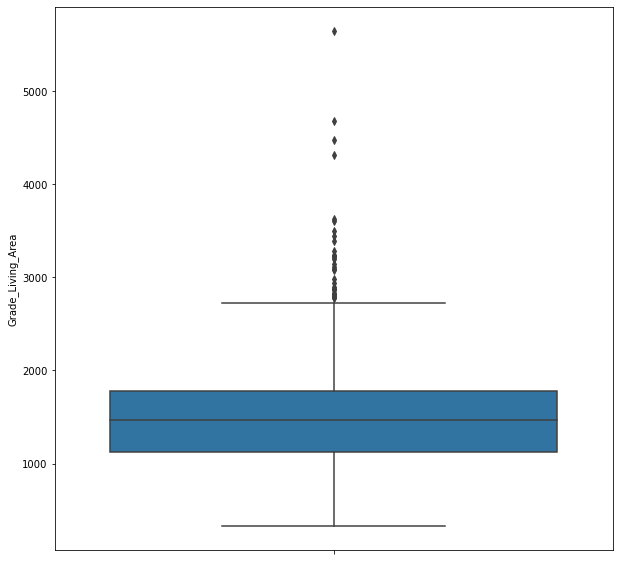

In [28]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Grade_Living_Area")

<AxesSubplot:xlabel='Grade_Living_Area', ylabel='Density'>

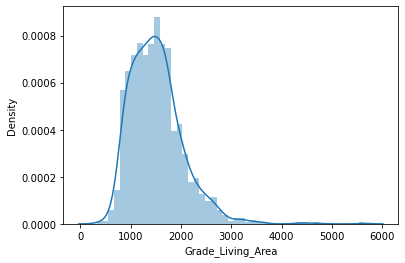

In [29]:
sns.distplot(train.Grade_Living_Area)

In [30]:
IQR=train.Grade_Living_Area.quantile(0.75)-train.Grade_Living_Area.quantile(0.25)
IQR

648.5

In [31]:
ilb1=train.Grade_Living_Area.quantile(0.25)-(IQR*3)       # for extreme boundary instead of 1.5 we can take 3
iub1=train.Grade_Living_Area.quantile(0.75)+(IQR*3)
ilb1,iub1

(-816.5, 3723.0)

In [32]:
train.loc[train["Grade_Living_Area"]>3723.0,"Grade_Living_Area"]=3723.0

<AxesSubplot:xlabel='Grade_Living_Area', ylabel='Density'>

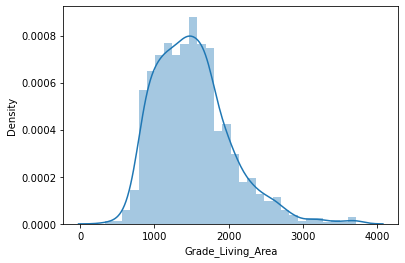

In [33]:
sns.distplot(train.Grade_Living_Area)

<AxesSubplot:ylabel='House_Condition'>

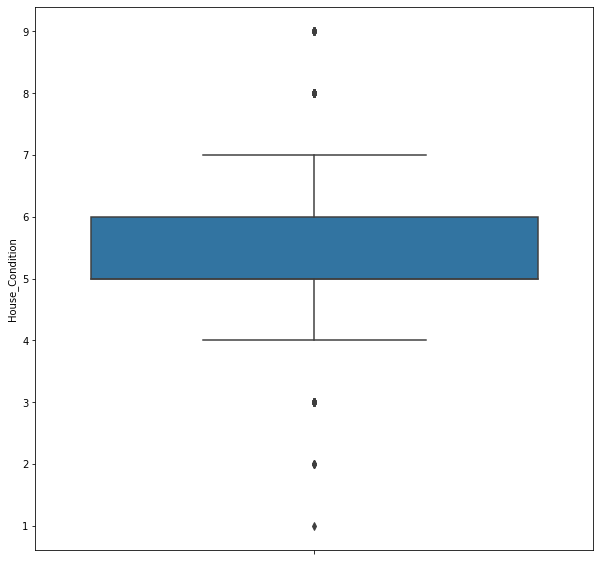

In [34]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="House_Condition")

<AxesSubplot:xlabel='House_Condition', ylabel='Density'>

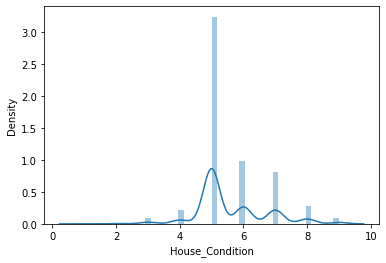

In [35]:
sns.distplot(train.House_Condition)

In [36]:
IQR=train.House_Condition.quantile(0.75)-train.House_Condition.quantile(0.25)
IQR

1.0

In [37]:
ilb1=train.House_Condition.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.House_Condition.quantile(0.75)+(IQR*3)
ilb1,iub1

(2.0, 9.0)

In [38]:
train.loc[train["Grade_Living_Area"]>9.0,"Grade_Living_Area"]=9.0
train.loc[train["Grade_Living_Area"]>2.0,"Grade_Living_Area"]=2.0

<AxesSubplot:ylabel='Construction_Year'>

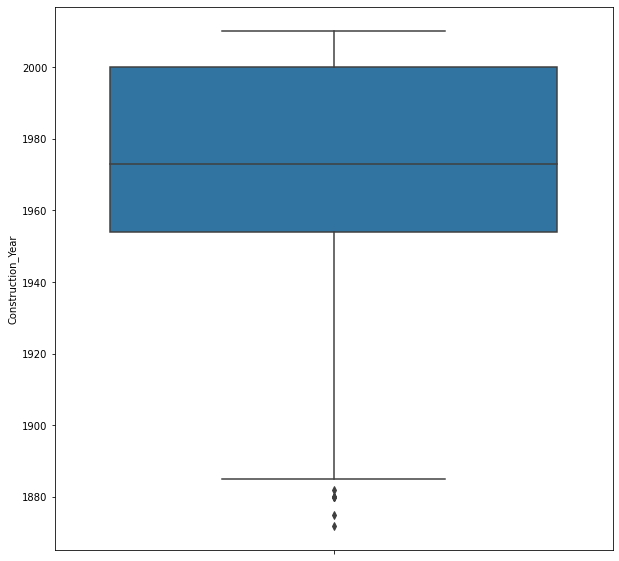

In [39]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Construction_Year")

<AxesSubplot:xlabel='Construction_Year', ylabel='Density'>

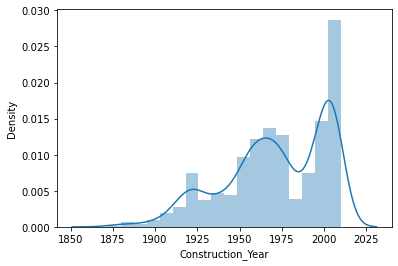

In [40]:
sns.distplot(train.Construction_Year)

In [41]:
IQR=train.Construction_Year.quantile(0.75)-train.Construction_Year.quantile(0.25)
IQR

46.0

In [42]:
ilb1=train.Construction_Year.quantile(0.25)-(IQR*3)    # for extreme boundary instead of 1.5 we can take 3
iub1=train.Construction_Year.quantile(0.75)+(IQR*3)
ilb1,iub1

(1816.0, 2138.0)

In [43]:
train.loc[train["Construction_Year"]>1816.0,"Construction_Year"]=1816.0

<AxesSubplot:xlabel='Construction_Year', ylabel='Density'>

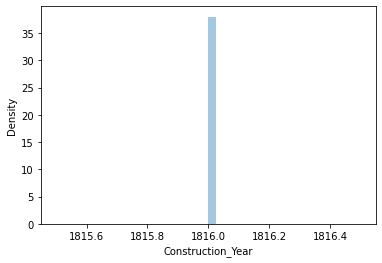

In [44]:
sns.distplot(train.Construction_Year)

<AxesSubplot:ylabel='Brick_Veneer_Area'>

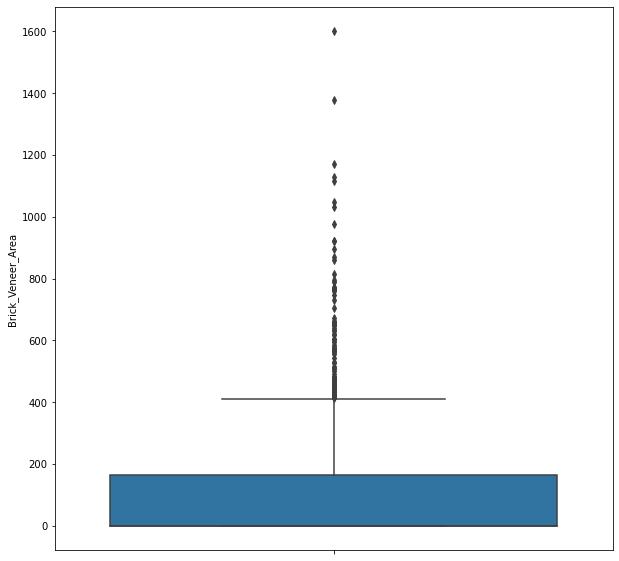

In [45]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Brick_Veneer_Area")

<AxesSubplot:xlabel='Brick_Veneer_Area', ylabel='Density'>

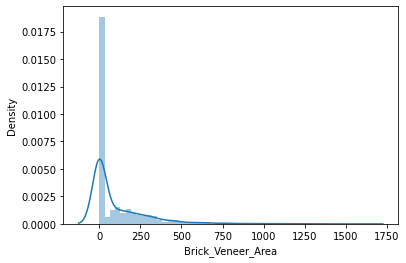

In [46]:
 sns.distplot(train.Brick_Veneer_Area)

In [47]:
IQR=train.Brick_Veneer_Area.quantile(0.75)-train.Brick_Veneer_Area.quantile(0.25)
IQR

164.5

In [48]:
ilb1=train.Brick_Veneer_Area.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.Brick_Veneer_Area.quantile(0.75)+(IQR*3)
ilb1,iub1

(-493.5, 658.0)

In [49]:
train.loc[train["Brick_Veneer_Area"]>658.0,"Brick_Veneer_Area"]=658.0

<AxesSubplot:xlabel='Brick_Veneer_Area', ylabel='Density'>

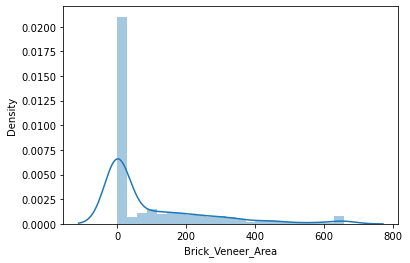

In [50]:
sns.distplot(train.Brick_Veneer_Area)

<AxesSubplot:ylabel='Total_Basement_Area'>

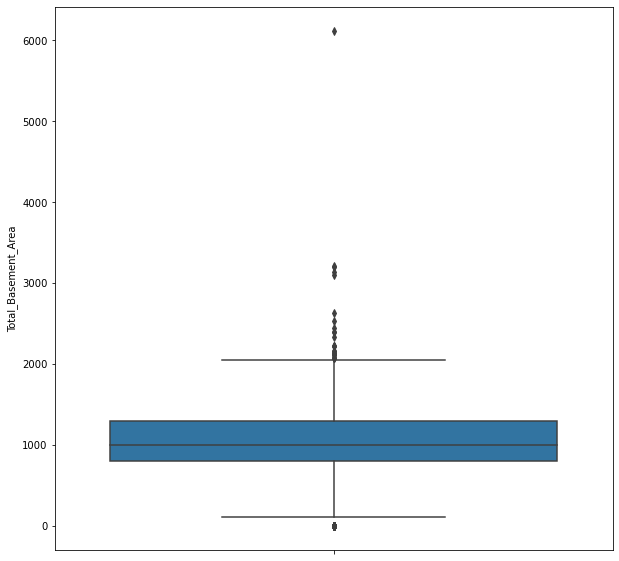

In [51]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Total_Basement_Area")

<AxesSubplot:xlabel='Total_Basement_Area', ylabel='Density'>

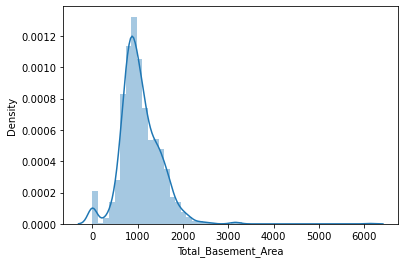

In [52]:
sns.distplot(train.Total_Basement_Area)

In [53]:
IQR=train.Total_Basement_Area.quantile(0.75)-train.Total_Basement_Area.quantile(0.25)
IQR

503.0

In [54]:
ilb1=train.Total_Basement_Area.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.Total_Basement_Area.quantile(0.75)+(IQR*3)
ilb1,iub1

(-713.5, 2807.5)

In [55]:
train.loc[train["Total_Basement_Area"]> 2807.5,"Total_Basement_Area"]= 2807.5

<AxesSubplot:xlabel='Total_Basement_Area', ylabel='Density'>

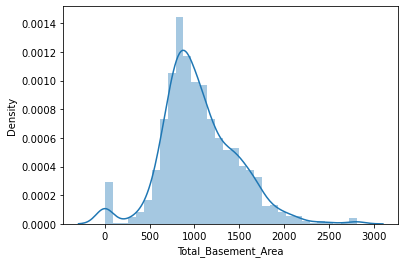

In [56]:
sns.distplot(train.Total_Basement_Area)

<AxesSubplot:ylabel='First_Floor_Area'>

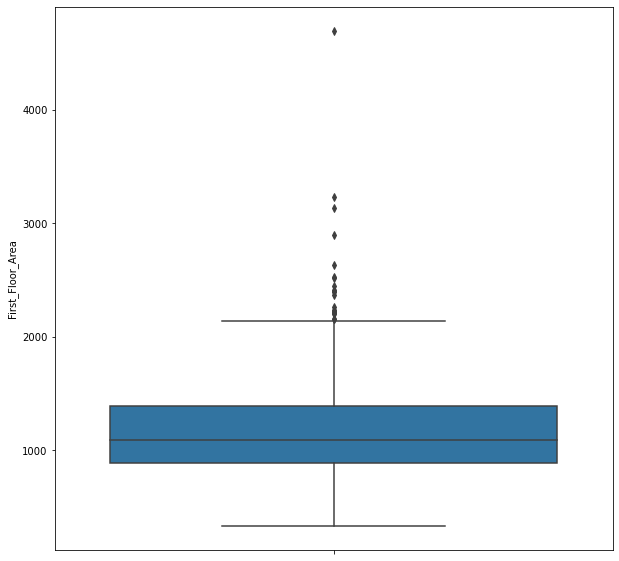

In [57]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="First_Floor_Area")

<AxesSubplot:xlabel='First_Floor_Area', ylabel='Density'>

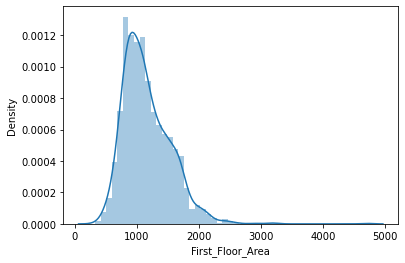

In [58]:
sns.distplot(train.First_Floor_Area)

In [59]:
IQR=train.First_Floor_Area.quantile(0.75)-train.First_Floor_Area.quantile(0.25)
IQR

509.5

In [60]:
ilb1=train.First_Floor_Area.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.First_Floor_Area.quantile(0.75)+(IQR*3)
ilb1,iub1

(-646.5, 2920.0)

In [61]:
train.loc[train["First_Floor_Area"]> 2920.0,"First_Floor_Area"]= 2920.0

<AxesSubplot:xlabel='First_Floor_Area', ylabel='Density'>

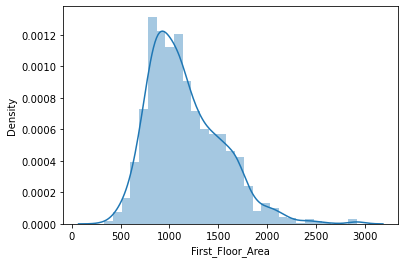

In [62]:
sns.distplot(train.First_Floor_Area)

<AxesSubplot:ylabel='Rooms_Above_Grade'>

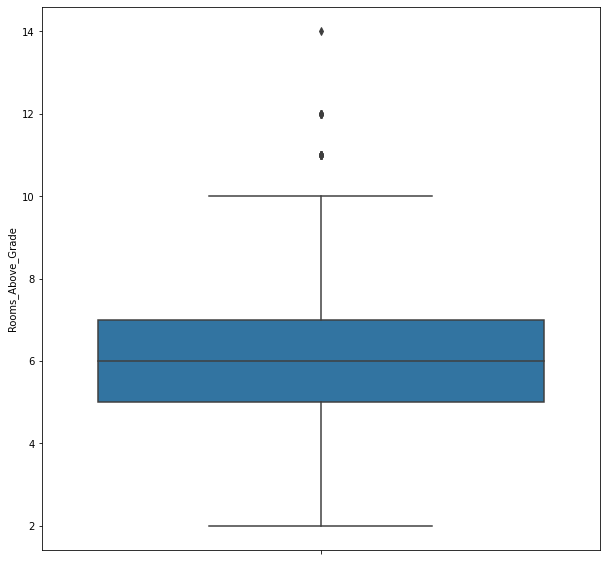

In [63]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Rooms_Above_Grade")

<AxesSubplot:xlabel='Rooms_Above_Grade', ylabel='Density'>

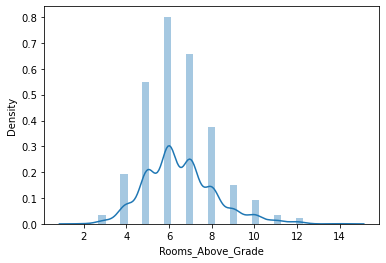

In [64]:
sns.distplot(train.Rooms_Above_Grade)

In [65]:
IQR=train.Rooms_Above_Grade.quantile(0.75)-train.Rooms_Above_Grade.quantile(0.25)
IQR

2.0

In [66]:
ilb1=train.Rooms_Above_Grade.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.Rooms_Above_Grade.quantile(0.75)+(IQR*3)
ilb1,iub1

(-1.0, 13.0)

In [67]:
train.loc[train["Rooms_Above_Grade"]> 13.0,"Rooms_Above_Grade"]= 13.0

<AxesSubplot:ylabel='Sale_Price'>

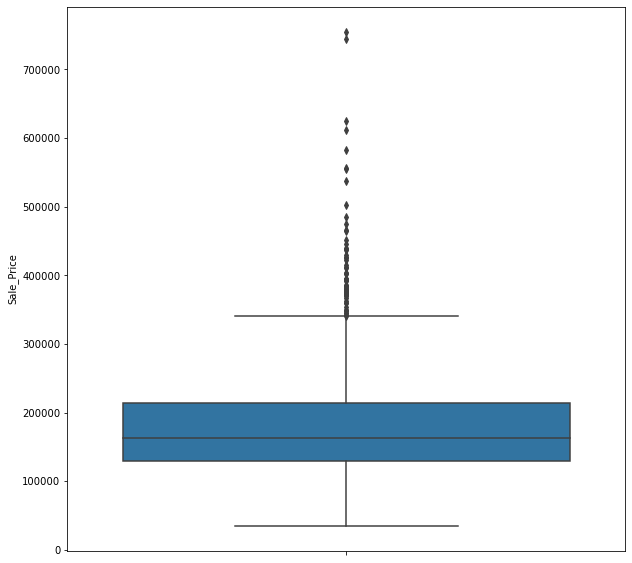

In [68]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=train,y="Sale_Price")

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

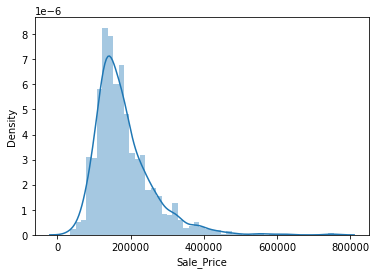

In [69]:
sns.distplot(train.Sale_Price)

In [70]:
IQR=train.Sale_Price.quantile(0.75)-train.Sale_Price.quantile(0.25)
IQR

84050.0

In [71]:
ilb1=train.Sale_Price.quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub1=train.Sale_Price.quantile(0.75)+(IQR*3)
ilb1,iub1

(-122200.0, 466150.0)

In [72]:
train.loc[train["Sale_Price"]> 466150.0,"Sale_Price"]= 466150.0

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

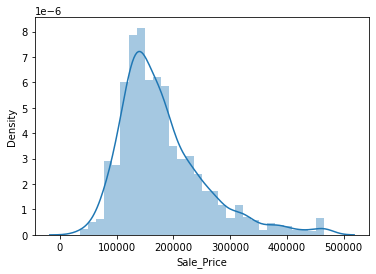

In [73]:
sns.distplot(train.Sale_Price)

In [74]:
train.shape

(1459, 68)

Imported cleaned test file

In [76]:
data1=pd.read_csv("cleaned_test1.csv")
data1

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Sale_Type,Sale_Condition
0,20,3,80.0,16104.819760,0,0,0,0,0,0,...,1.0,0,0,0,120,0,0,6,0,0
1,20,0,81.0,15639.150810,0,1,0,0,1,0,...,1.0,0,0,0,0,0,12500,6,0,0
2,60,0,74.0,3849.428920,0,1,0,0,0,0,...,2.0,0,0,0,0,0,0,3,0,0
3,60,0,78.0,4955.447942,0,1,0,0,0,0,...,2.0,0,0,0,0,0,0,6,0,0
4,120,0,43.0,3046.604942,0,1,2,0,0,0,...,2.0,0,0,0,144,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,21.0,14584.838440,0,0,0,0,0,0,...,0.0,1,1,0,0,0,0,6,0,1
1455,160,1,21.0,8072.991379,0,0,0,0,0,0,...,1.0,0,0,0,0,0,0,4,0,5
1456,20,0,160.0,7367.775348,0,0,0,0,0,0,...,2.0,0,0,0,0,0,0,9,0,3
1457,85,0,62.0,2203.135444,0,0,0,0,0,0,...,0.0,1,1,0,0,0,700,7,0,0


In [77]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int64  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   float64
 4   Road_Type                  1459 non-null   int64  
 5   Property_Shape             1459 non-null   int64  
 6   Land_Outline               1459 non-null   int64  
 7   Utility_Type               1459 non-null   int64  
 8   Lot_Configuration          1459 non-null   int64  
 9   Property_Slope             1459 non-null   int64  
 10  Neighborhood               1459 non-null   int64  
 11  Condition1                 1459 non-null   int64  
 12  Condition2                 1459 non-null   int64  
 13  House_Type                 1459 non-null   int64

In [78]:
train.shape,data1.shape

((1459, 68), (1459, 66))

# Model Building

In [79]:
prop_x=train.iloc[:,0:-1]       #independent v
prop_y=train.iloc[:,-1]         #target
test_x=data1.iloc[:,1:]

In [80]:
prop_x.shape,prop_y.shape,test_x.shape

((1459, 67), (1459,), (1459, 65))

In [81]:
import sklearn
from sklearn.model_selection import train_test_split

In [82]:
prop_x_train,prop_x_test,prop_y_train,prop_y_test=train_test_split(prop_x,prop_y,test_size=0.2,random_state=101)

In [83]:
prop_x_train.shape,prop_x_test.shape,prop_y_train.shape,prop_y_test.shape

((1167, 67), (292, 67), (1167,), (292,))

# 1.Linear Regression

In [84]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [85]:
lin.fit(prop_x,prop_y)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [86]:
l1_p=lin.predict(prop_x_test)
l1_p

array([178044.78967805, 193881.25674016,  86767.28939696, 144703.81135521,
       170506.4496801 , 169237.91388585, 314431.78755525, 184489.64475542,
       178505.25749171, 156386.27461484, 147711.98637193, 190007.96234239,
       238341.77140554, 149214.67403561,  80810.64071377,  98708.79933397,
       244332.89236471, 267065.80201592, 113281.96136119, 133376.38565479,
       112917.28758274, 375524.35828717, 166416.94389385, 220772.80991221,
        60132.5159931 ,  89233.57176343, 123143.51201908, 196100.96779547,
       137461.84456866, 115683.21241327, 212235.24421323, 129267.52728938,
       269690.69682708, 211759.70643446, 125465.36613645, 130142.38005372,
       340581.60040896, 159892.63968473, 367044.96510186, 228548.93465567,
       184548.36852425, 183884.96854557, 204433.15603262, 116244.55092566,
       237886.36250271, 188695.06299548, 113019.01288812, 146449.65587743,
       144802.54484146,  48447.24331971, 134494.52195535, 151834.14955978,
       162417.98157378, 1

In [87]:
lin.intercept_

-655026.653159338

In [88]:
lin.coef_

array([-1.20295152e+02, -1.96979734e+03,  6.11877252e+01,  4.84885724e-01,
       -3.93453319e+04,  2.33955145e+03, -7.70530032e+02, -4.23997151e+04,
       -1.86510994e+02, -1.16301064e+03,  5.61015570e+02, -2.74214412e+03,
       -9.37418783e+03, -2.31453603e+03,  5.81514856e+01,  1.26603348e+04,
        4.87691597e+03, -1.03307229e-09,  1.56860303e+02,  2.50791951e+03,
       -1.61615885e+03,  1.27905998e+03, -8.31879196e+02, -1.28518733e+03,
        2.67469593e+01,  1.05852569e+04, -7.28679335e+02, -3.12639912e+03,
        6.66691278e+03, -6.17722012e+02,  4.61301062e+03, -3.79147204e+02,
       -1.19652338e+02,  1.38488039e+02, -1.33457210e+02, -1.38449625e+02,
        1.64506909e+02,  8.18496085e+02, -1.33085253e+03, -3.07533319e+03,
        1.40750950e+03,  3.80572824e+01,  4.33529170e+01, -3.97903932e-11,
        2.88793743e+03, -4.58879433e+03, -7.73426285e+01,  3.23434233e+03,
       -5.20115314e+03,  4.92239829e+03,  3.40960774e+03, -5.61104919e+03,
        4.83234507e+03, -

In [89]:
R2=lin.score(prop_x_train,prop_y_train)
R2

0.8903827087207973

In [90]:
adj_R2=1-(((1-R2)*(1167-1))/(1167-67-1))
adj_R2

0.8836999439203364

In [91]:
from sklearn import metrics

In [92]:
prop_mae=metrics.mean_absolute_error(prop_y_test,l1_p)
prop_mae

17192.46639777519

In [93]:
prop_mse=metrics.mean_squared_error(prop_y_test,l1_p)
prop_mse

532308358.63782805

In [94]:
prop_rmse=np.sqrt(prop_mse)
prop_rmse

23071.808742225392

In [95]:
#error
error=prop_y_test-l1_p


In [96]:
#error_abs
error_abs=np.absolute(error)


In [97]:
prop_mape=np.mean(error_abs/prop_y_test)*100
prop_mape

10.596516126971922

In [98]:
prop_acc1=100-prop_mape
prop_acc1

89.40348387302808

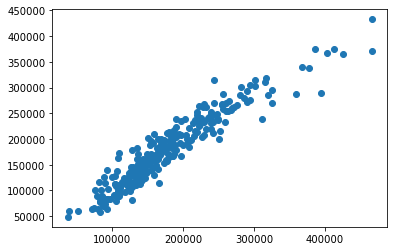

In [99]:
plt.scatter(prop_y_test,l1_p)

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

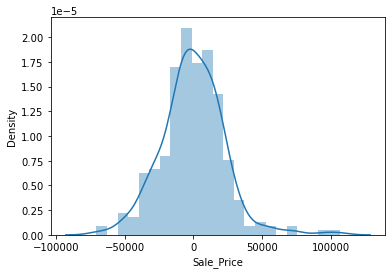

In [100]:
sns.distplot(prop_y_test-l1_p)

# 2.LASSO (L1) 

In [101]:
from sklearn.linear_model import Lasso
lo=Lasso()

In [102]:
lo.fit(prop_x_train,prop_y_train)

Lasso()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [103]:
#lo_p
lo_p=lo.predict(prop_x_test)


In [104]:
lo.coef_

array([-1.31184320e+02, -2.21553070e+03,  2.90800214e+01,  4.70839814e-01,
       -3.89525410e+04,  3.13587861e+03, -8.58272374e+01, -4.36881365e+04,
       -2.67191290e+02, -2.50575478e+03,  5.57578864e+02, -3.13471132e+03,
       -1.18632154e+04, -2.58494491e+03,  4.96901407e+02,  1.25042247e+04,
        4.16622199e+03,  0.00000000e+00,  1.37729883e+02,  3.05940746e+03,
       -2.85200074e+03,  1.52486222e+03, -8.59416849e+02, -7.16132718e+02,
        2.72685786e+01,  9.63934703e+03, -1.32368524e+03, -2.96479776e+03,
        6.88055120e+03, -1.18108208e+03,  4.67275488e+03, -1.01897304e+03,
       -8.12248436e+01, -5.55356099e+02, -9.13953733e+01, -1.03877976e+02,
        1.28851399e+02, -3.03555981e+03, -2.30269651e+03, -2.41526092e+03,
        7.51371474e+02,  3.66348689e+01,  4.28003942e+01,  0.00000000e+00,
        1.62922080e+03, -6.56158014e+03,  1.48575596e+02,  3.21961659e+03,
       -4.80205525e+03,  5.50725629e+03,  3.32590545e+03, -5.31163263e+03,
        5.09263750e+03, -

In [105]:
lo_r2=lo.score(prop_x_train,prop_y_train)
lo_r2

0.891565499800648

In [106]:
lo_adj_R2=1-(((1-lo_r2)*(1167-1))/(1167-67-1))
lo_adj_R2

0.8849548432825801

In [107]:
df1=pd.DataFrame({"Importance":list(lo.coef_),"columns":list(prop_x)})
df1

,Importance,columns
0,-131.184320,Building_Class
1,-2215.530696,Zoning_Class
2,29.080021,Lot_Extent
3,0.470840,Lot_Size
4,-38952.540981,Road_Type
...,...,...
62,22.203929,Pool_Area
63,0.554937,Miscellaneous_Value
64,69.996377,Month_Sold
65,4263.174616,Sale_Type


In [108]:
new=pd.DataFrame(train,columns=["Building_Class","Brick_Veneer_Area","Construction_Year","First_Floor_Area","Total_Basement_Area","Garage_Size","Overall_Material","Grade_Living_Area","Lot_Extent","Lot_Size","Month_Sold","House_Condition","Sale_Condition","Sale_Price"])
new

,Building_Class,Brick_Veneer_Area,Construction_Year,First_Floor_Area,Total_Basement_Area,Garage_Size,Overall_Material,Grade_Living_Area,Lot_Extent,Lot_Size,Month_Sold,House_Condition,Sale_Condition,Sale_Price
0,60,196.0,1816,856,856.0,2,7,2,65.0,8450,2,5,0,208500
1,20,0.0,1816,1262,1262.0,2,6,2,80.0,9600,5,8,0,181500
2,60,162.0,1816,920,920.0,2,7,2,68.0,11250,9,5,0,223500
3,70,0.0,1816,961,756.0,3,7,2,60.0,9550,2,5,2,140000
4,60,350.0,1816,1145,1145.0,3,8,2,84.0,14260,12,5,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,0.0,1816,1221,1221.0,2,7,2,62.0,7500,10,5,0,185000
1455,60,0.0,1816,953,953.0,2,6,2,62.0,7917,8,5,0,175000
1456,20,119.0,1816,2073,1542.0,2,6,2,85.0,13175,2,6,0,210000
1457,70,0.0,1816,1188,1152.0,1,7,2,66.0,9042,5,9,0,266500


In [109]:
new_x=new.iloc[:,0:13]
new_y=new.iloc[:,-1]

In [110]:
new_x.shape,new_y.shape

((1459, 13), (1459,))

In [111]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=101)

In [112]:
new_x_train.shape,new_x_test.shape,new_y_train.shape,new_y_test.shape

((1167, 13), (292, 13), (1167,), (292,))

In [113]:
lin.fit(new_x_train,new_y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [114]:
n_p=lin.predict(new_x_test)
n_p

array([191155.34860169, 213301.83785108,  60675.95975256, 148804.60617519,
       189763.01555381, 175966.27559482, 299999.57877189, 190764.22305006,
       179124.55834965, 183518.98302889, 117882.00248132, 199178.06219077,
       226828.8992756 , 161981.16871781, 114946.47023238, 124125.86565476,
       205826.01637883, 246702.51605961, 135758.6535326 , 148484.99006373,
       132917.80440765, 342546.04732824, 146979.88836908, 197279.8604998 ,
        77043.45595479,  89117.15801142, 118501.68329222, 173913.99225936,
       128277.86073015, 118526.73685148, 188592.56940986, 132964.12651696,
       257965.21750468, 212682.62742874, 131080.80027423, 118020.745126  ,
       333099.0694569 , 165069.30061794, 369555.46382661, 202673.04511194,
       155953.11061566, 202228.70594504, 191644.26045306, 134999.9539435 ,
       245365.4749778 , 191095.58088753, 120662.229326  , 123099.28534535,
       136730.63387965,  22464.71997453, 132117.99236989, 175438.57158889,
        83707.98319118, 1

In [115]:
n_R2=lin.score(new_x_train,new_y_train)
n_R2

0.7796037363349918

In [116]:
ad_R2=1-(((1-n_R2)*(1167-1))/(1167-13-1))
ad_R2

0.7771187827984393

In [117]:
new_mae=metrics.mean_absolute_error(new_y_test,n_p)
new_mae

24939.999045156765

In [118]:
new_mse=metrics.mean_squared_error(new_y_test,n_p)
new_mse

1363641174.8792918

In [119]:
new_rmse=np.sqrt(new_mse)
new_rmse

36927.51243827956

In [120]:
#error
error=new_y_test-l1_p


In [121]:
#error_abs
error_abs=np.absolute(error)


In [122]:
new_mape=np.mean(error_abs/new_y_test)*100
new_mape

10.596516126971922

In [123]:
new_acc1=100-new_mape
new_acc1

89.40348387302808

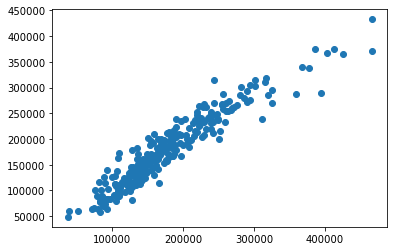

In [124]:
plt.scatter(new_y_test,l1_p)

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

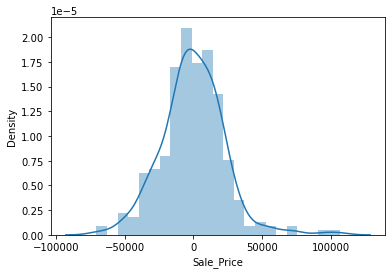

In [125]:
sns.distplot(new_y_test-l1_p)

# Creating report of all the models using linear regression & Lasso

In [126]:
l1=["Linear","lasso"]

In [127]:
l2=[R2,lo_r2]

In [128]:
l3=[adj_R2,lo_adj_R2]

In [129]:
l4=[prop_mse,new_mse]

# Summarizing all the result

In [130]:
final_df=pd.DataFrame({"model_name":l1,"R_square":l2,"Adj_R2":l3,"Mse":l4})

In [131]:
final_df

,model_name,R_square,Adj_R2,Mse
0,Linear,0.890383,0.883700,5.323084e+08
1,lasso,0.891565,0.884955,1.363641e+09
